In [1]:
import os
import cv2
import numpy as np
import pandas as ps
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_path = "../input/voyellesegmask/datasetSegVoyCorr/datasetSegCorr/train/"
test_path = "../input/voyellesegmask/datasetSegVoyCorr/datasetSegCorr/test/"

In [3]:
size = (128, 128)

In [4]:
def imageArray(path, size):
    data = []
    Totalnb = 0
    label = []
    i = 0
    sList = os.listdir(path)
    sList.sort
    for d in sList:
        sub_dir = path + d
        nb = 0        
        #if d not in ['ji!-', "d'!-", 'u---', 'Ga-!', 'i---', 'r--']:
        for sd in os.listdir(sub_dir):
            sub_sub_dir = sub_dir + "/" + sd
            tmp = []
            count = 0

            liste = os.listdir(sub_sub_dir)
            for img in liste:
                if count < 12:
                    image_path = sub_sub_dir + "/" + img
                    img_array = cv2.imread(image_path)
                    img_array = cv2.resize(img_array, dsize=size)
                    #print(img_array.shape)
                    count += 1

                    tmp.append(img_array)
                else :
                    break
            if len(tmp) == 12:
                #print(np.array(tmp).shape)
                nb += 1
                label.append([d, i])
                data.append(tmp)
                #print(np.array(data).shape)
            else:
                print(d, sd, len(liste))
        if nb != 0:
            i += 1
            #print(d,"Label number of Dataset is:",nb)
            Totalnb = Totalnb + nb
    #print("Total Number of Data is",Totalnb)    
    return data, label, Totalnb

In [5]:
train, train_label, train_totalnb = imageArray(train_path, size)
test, test_label, test_totalnb = imageArray(test_path, size)

In [6]:
x_train = np.array(train)
x_test = np.array(test)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [9]:
print(x_train.shape, train_label.shape)
print(x_test.shape, test_label.shape)

(44, 12, 128, 128, 3) (44, 2)
(12, 12, 128, 128, 3) (12, 2)


In [10]:
y_train = np.eye(3)[train_label[:,1].astype(int)]
#y_train

In [11]:
y_test = test_label[0:,1]
y_test.shape

(12,)

In [12]:
!pip install --upgrade Keras-Applications-3D

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.8/157.8 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 51.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 58.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.0
    Uninstalling tensorboard-2.10.0:
      Successfully uninstalle

In [13]:
from keras_applications_3d import vgg16, vgg19, resnet, resnet_v2, densenet
from tensorflow.keras.optimizers import Adam

**ResNet50**

In [85]:
resnet50 = resnet.ResNet50(
  input_shape=(12, 128, 128, 3), classes=3,
  base_channel=16
)
resnet50.summary()

Model: "resnet50_3d"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 12, 128, 128 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding3D)       (None, 18, 134, 134, 0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv3D)             (None, 6, 64, 64, 16 16480       conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 6, 64, 64, 16 64          conv1_conv[0][0]                 
________________________________________________________________________________________

In [86]:
resnet50.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)
hist = resnet50.fit(x_train, y_train, batch_size=10, epochs=300, validation_split=0.2)#100%///75%
#hist = resnet50.fit(x_train, y_train, batch_size=32, epochs=800, validation_split=0.2)#100%///66%
#hist = resnet50.fit(x_train, y_train, batch_size=10, epochs=800, validation_split=0.2)#100%///66%
#hist = resnet50.fit(x_train, y_train, batch_size=16, epochs=500, validation_split=0.2)#100%///58%

Epoch 1/300
4/4 [==============================] - 12s 1s/step - loss: 1.2665 - accuracy: 0.4000 - val_loss: 1.2668 - val_accuracy: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 2s 504ms/step - loss: 1.3518 - accuracy: 0.5714 - val_loss: 1.3291 - val_accuracy: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 2s 497ms/step - loss: 1.3586 - accuracy: 0.5429 - val_loss: 1.3531 - val_accuracy: 0.0000e+00
Epoch 4/300
4/4 [==============================] - 2s 507ms/step - loss: 1.3024 - accuracy: 0.5143 - val_loss: 1.3548 - val_accuracy: 0.0000e+00
Epoch 5/300
4/4 [==============================] - 2s 495ms/step - loss: 0.8439 - accuracy: 0.5714 - val_loss: 1.4115 - val_accuracy: 0.0000e+00
Epoch 6/300
4/4 [==============================] - 2s 536ms/step - loss: 0.8314 - accuracy: 0.7429 - val_loss: 1.4705 - val_accuracy: 0.0000e+00
Epoch 7/300
4/4 [==============================] - 2s 490ms/step - loss: 0.5071 - accuracy: 0.8000 - val_loss: 1.6385 - val_accuracy

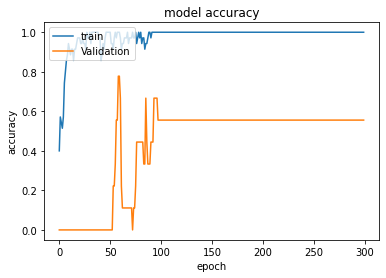

In [87]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

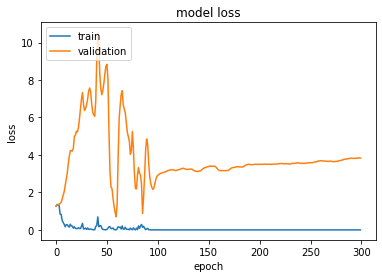

In [88]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [89]:
resnet50_pred = resnet50.predict(x_test)

In [90]:
y_classes = np.argmax(resnet50_pred, axis=1)
y_classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [91]:
gg = y_test.astype(int)==y_classes
test_set_accuracy = np.mean(gg)
test_set_accuracy

0.75

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_test.astype(int), y_classes, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.60      0.75      0.67         4
           2       1.00      0.50      0.67         4

    accuracy                           0.75        12
   macro avg       0.80      0.75      0.74        12
weighted avg       0.80      0.75      0.74        12



**resnet 152**

In [15]:
resnet152 = resnet.ResNet152(
  input_shape=(12, 128, 128, 3), classes=3,
  base_channel=16
)
resnet152.summary()

Model: "resnet152_3d"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 12, 128, 128 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding3D)       (None, 18, 134, 134, 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv3D)             (None, 6, 64, 64, 16 16480       conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 6, 64, 64, 16 64          conv1_conv[0][0]                 
_______________________________________________________________________________________

In [16]:
resnet152.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)
hist = resnet152.fit(x_train, y_train, batch_size=10, epochs=300, validation_split=0.2)#100%///92%

2022-08-29 19:42:28.146979: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
4/4 [==============================] - 31s 3s/step - loss: 2.8011 - accuracy: 0.2571 - val_loss: 1.3224 - val_accuracy: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 4s 869ms/step - loss: 1.5089 - accuracy: 0.3714 - val_loss: 1.5013 - val_accuracy: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 4s 886ms/step - loss: 1.1389 - accuracy: 0.4857 - val_loss: 1.5794 - val_accuracy: 0.0000e+00
Epoch 4/300
4/4 [==============================] - 4s 926ms/step - loss: 1.0376 - accuracy: 0.4286 - val_loss: 1.6957 - val_accuracy: 0.0000e+00
Epoch 5/300
4/4 [==============================] - 4s 895ms/step - loss: 1.0255 - accuracy: 0.4286 - val_loss: 1.7711 - val_accuracy: 0.0000e+00
Epoch 6/300
4/4 [==============================] - 4s 911ms/step - loss: 0.8743 - accuracy: 0.6000 - val_loss: 1.7714 - val_accuracy: 0.0000e+00
Epoch 7/300
4/4 [==============================] - 4s 935ms/step - loss: 0.7823 - accuracy: 0.6000 - val_loss: 1.7739 - val_accuracy

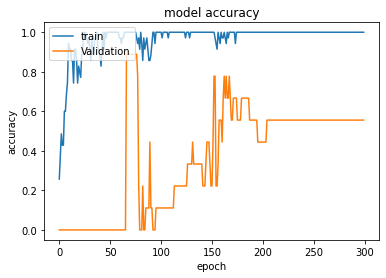

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

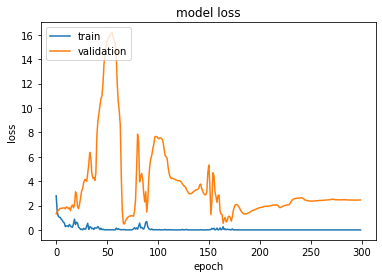

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
resnet152_pred = resnet152.predict(x_test)

In [21]:
y_classes = np.argmax(resnet152_pred, axis=1)
y_classes

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2])

In [22]:
gg = y_test.astype(int)==y_classes
test_set_accuracy = np.mean(gg)
test_set_accuracy

0.9166666666666666

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test.astype(int), y_classes, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



In [27]:
from sklearn.metrics import confusion_matrix

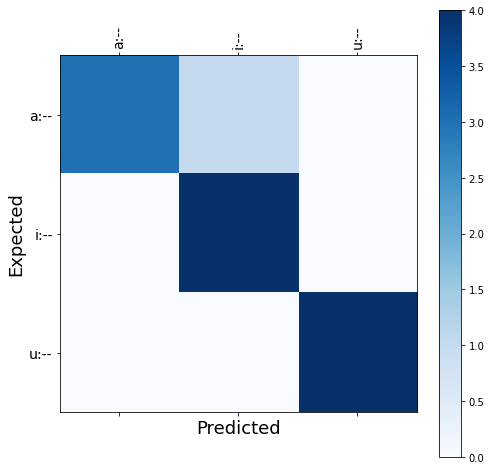

In [66]:
conf_mat = confusion_matrix(y_true=test_label[:,0], y_pred=temp)

fig = plt.figure(figsize=(8,8))
plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=fig.number)
plt.colorbar()
plt.xticks(np.arange(3), ["a:--", "i:--", "u:--"], rotation=90, fontsize=14)
plt.yticks(np.arange(3), ["a:--", "i:--", "u:--"], fontsize=14)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Expected', fontsize=18)
plt.show()

In [58]:
test_label[:,0]

array(['u!--', 'u!--', 'u!--', 'u!--', 'i!--', 'i!--', 'i!--', 'i!--',
       'a!--', 'a!--', 'a!--', 'a!--'], dtype='<U21')

In [64]:
temp = []
for s in y_classes:
    if s == 0:temp.append("u!--")
    elif s == 1: temp.append("i!--")
    elif s == 2: temp.append("a!--")

In [61]:
temp = np.array(temp)
temp

array(['u:--', 'u:--', 'u:--', 'u:--', 'i:--', 'i:--', 'i:--', 'i:--',
       'a:--', 'i:--', 'a:--', 'a:--'], dtype='<U4')

In [67]:
conf_mat

array([[3, 1, 0],
       [0, 4, 0],
       [0, 0, 4]])